In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense


from keras.initializers import GlorotUniform

from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

from matplotlib import pyplot as plt

np.random.seed(2)

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data.

–ü–æ —Å—Å—ã–ª–∫–µ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –æ–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ –∑–∞–¥–∞—á–∏.

–¶–µ–ª—å - –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ –¥–∏–∞–±–µ—Ç–∞ –ø–æ –∞–Ω–∞–º–Ω–µ–∑—É –ø–∞—Ü–∏–µ–Ω—Ç–∞.

In [2]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

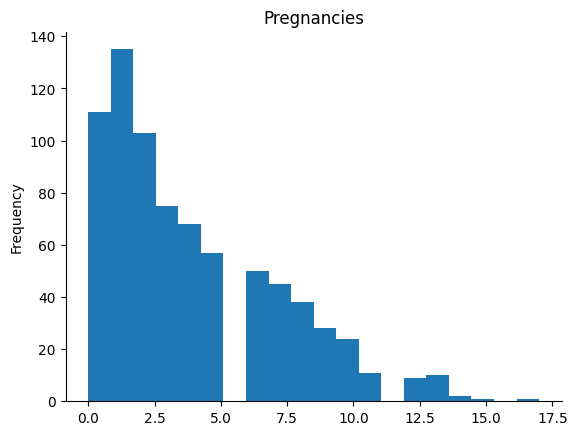

In [3]:
df['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

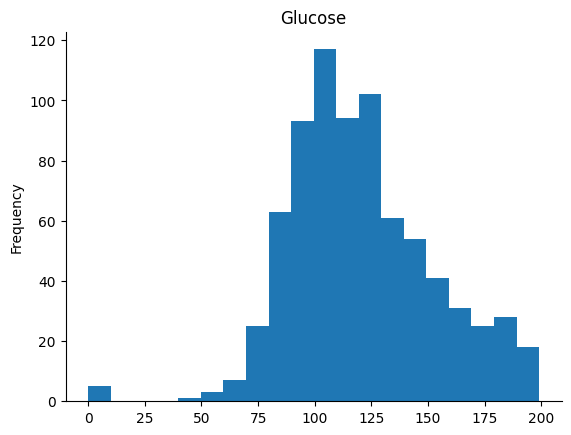

In [4]:
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

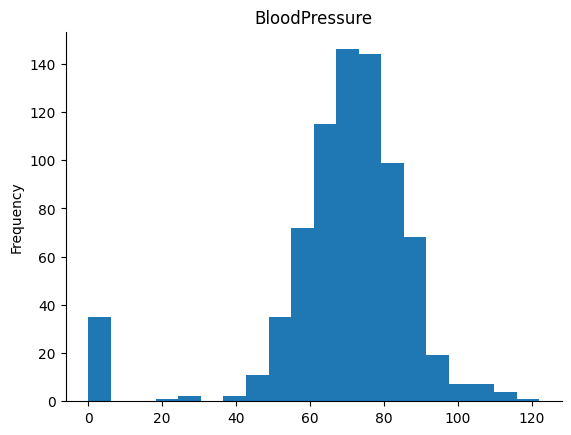

In [5]:
df['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

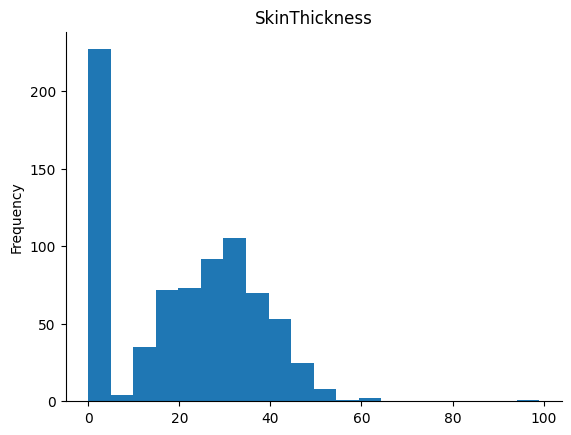

In [6]:
df['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

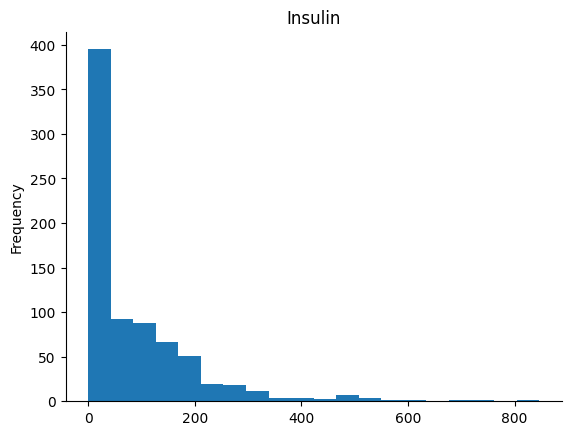

In [7]:
df['Insulin'].plot(kind='hist', bins=20, title='Insulin')
plt.gca().spines[['top', 'right',]].set_visible(False)

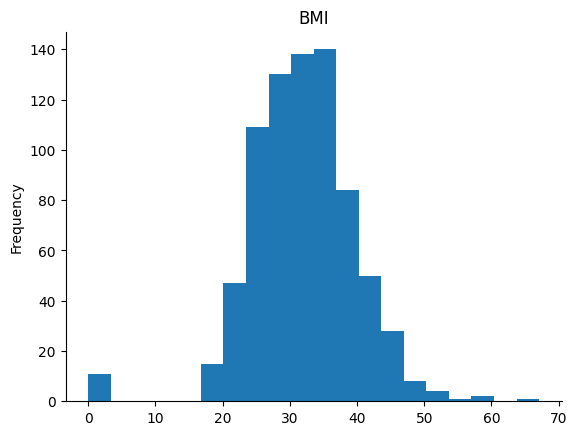

In [8]:
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

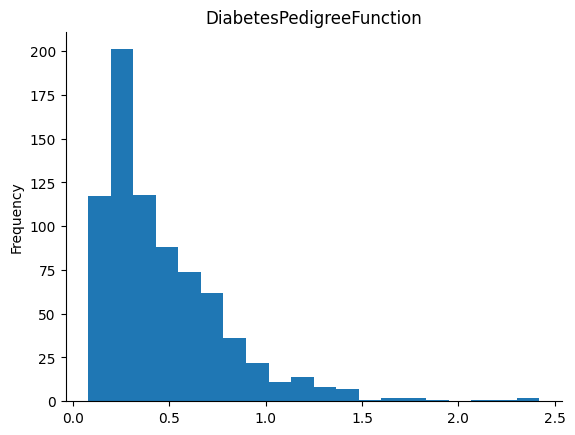

In [9]:
df['DiabetesPedigreeFunction'].plot(kind='hist', bins=20, title='DiabetesPedigreeFunction')
plt.gca().spines[['top', 'right',]].set_visible(False)

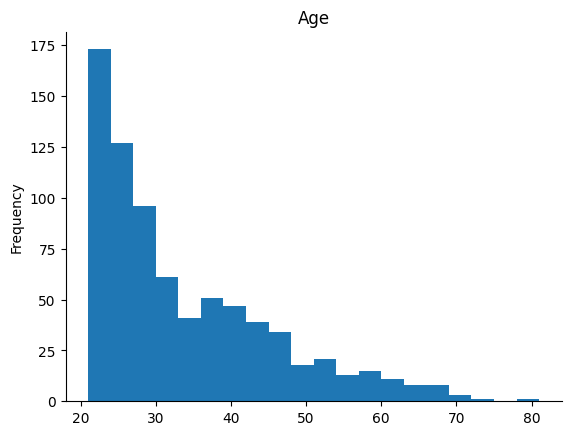

In [10]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

–†–∞–∑–¥–µ–ª—è–µ–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏. –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 80% –æ—Ç –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.

–§–æ—Ä–º–∏—Ä—É–µ–º –≤–µ–∫—Ç–æ—Ä –ø—Ä–∏–Ω–∞–∫–æ–≤ –∏ –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤(–≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤ –ø—Ä–∏–≤–æ–¥–∏–º –∫ —Ä–∞–∑–º–µ—Ä—É (...,2)), —Ç–∞–∫ –∫–∞–∫ –∏–º–µ–µ–º –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞.

In [11]:
X_train = df.iloc[:615,0:8]
X_test =  df.iloc[615:,0:8]

Y_train = to_categorical(df.iloc[:615,8], num_classes=2)
Y_test = to_categorical(df.iloc[615:,8], num_classes=2)

In [12]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
610            3      106             54             21      158  30.9   
611            3      174             58             22      194  32.9   
612            7      168             88             42      321  38.2   
613            6      105             80             28        0  32.5   
614           11      138             74             26      144  36.1   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
610                     0.292   24  
611                     0.593   36  
612                     0.787   40  
613                     0.878   26  
614                     0.557   50  

[615 rows x 8 columns]

In [13]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   
619            0      119              0              0        0  32.4   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50  
619                     0.141   24  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[153 rows x 8 columns]

In [14]:
Y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [15]:
Y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

–°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –≤—Ö–æ–¥–Ω—ã–µ –∏ –≤—ã—Ö–æ–¥–Ω—ã–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö, —Ä–∞–∑–º–µ—Ä—ã —Å–ª–æ–µ–≤, —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–∏ –∏ –º–µ—Ç–æ–¥—ã –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤.

–ò–º–µ–Ω–Ω–æ –Ω–∞ —ç—Ç–æ–º –º–æ–º–µ–Ω—Ç–µ –∑–∞–¥–∞–µ—Ç—Å—è –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–∞—á–∞–ª—å–Ω–æ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤. –ü–æ –∑–∞–¥–∞–Ω–∏—é, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º –ö—Å–∞–≤—å–µ—Ä–∞ —Å –Ω–æ—Ä–º–ª–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º.
–†–µ–∞–ª–∏–∑–∞—Ü–∏—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –¥–ª—è –≤–µ—Å–æ–≤ –æ–¥–Ω–æ–≥–æ —Å–ª–æ—è –º–æ–∂–µ—Ç –≤—ã–≥–ª—è–¥–µ—Ç—å —Ç–∞–∫:
```
params = numpy.random.normal(
    scale=gain * numpy.sqrt(
        2.0 / (prev_size + layer_size),
    ),
    size=(prev_size, layer_size),
)
```
–≥–¥–µ ùëôùëéùë¶ùëíùëü_ùë†ùëñùëßùëí - —Ä–∞–∑–º–µ—Ä —Å–ª–æ—è, ùëùùëüùëíùë£_ùë†ùëñùëßùëí ‚Äì —Ä–∞–∑–º–µ—Ä –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ
—Å–ª–æ—è, ùëîùëéùëñùëõ ‚Äì –ø–∞—Ä–∞–º–µ—Ç—Ä —É—Å–∏–ª–µ–Ω–∏—è, –∑–∞–≤–∏—Å—è—â–∏–π –æ—Ç —Ç–∏–ø–∞ —Ñ—É–Ω–∫—Ü–∏–π
–∞–∫—Ç–∏–≤–∞—Ü–∏–∏.

–û–¥–Ω–∞–∫–æ –≤ –±–∏–±–ª–æ–∏–æ—Ç–µ–∫–µ keras –≤ –º–æ–¥—É–ª–µ initializers –µ—Å—Ç—å –≥–æ—Ç–æ–≤—ã–π –º–µ—Ç–æ–¥, —Ä–µ–∞–ª–∏–∑—É—é—â–∏–π –∞–ª–≥–æ—Ä–∏—Ç–º –ö—Å–∞–≤—å–µ—Ä–∞ —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º - GlorotUniform.

In [16]:
# —Å–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏

input_dim = 8  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
output_dim = 2  # 2 –∫–ª–∞—Å—Å–∞ –Ω–∞ –≤—ã—Ö–æ–¥–µ

model = Sequential([
    # –î–æ–±–∞–≤–ª—è–µ–º –≤—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π —Å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –≤–µ—Å–æ–≤ –ø–æ –ö—Å–∞–≤—å–µ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ ReLU
    Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=GlorotUniform()),
    # –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ–µ–≤ —Å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –≤–µ—Å–æ–≤ –ø–æ –ö—Å–∞–≤—å–µ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ ReLU
    Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(32, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(16, activation='relu', kernel_initializer=GlorotUniform()),
    # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ softmax –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
    Dense(output_dim, activation='softmax', kernel_initializer=GlorotUniform())
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 17810 (69.57 KB)
Trainable params: 17810 (

–ü—Ä–∏ –ø–æ–º–æ—â–∏ –º–µ—Ç–æ–¥–∞ compile() —Å–∫–æ–º–ø–∏–ª–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å.

* loss ‚Äì —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å
* optimizer ‚Äì –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä, –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π –º–µ—Ç–æ–¥ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ adam
* metrics ‚Äì —Å–ø–∏—Å–æ–∫ –º–µ—Ç—Ä–∏–∫ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, —Ç–∞–∫ –∫–∞–∫ –¥–∞–Ω–∞ –∑–∞–¥–∞—á–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∏—Å–ø–æ–ª—å–∑—É–µ–º –º–µ—Ç—Ä–∏–∫—É accuracy –∫–∞–∫ –æ—Å–Ω–æ–≤–Ω—É—é

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy', 'Recall'])

–û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å

In [18]:
model.fit(X_train, Y_train, epochs = 250)

Epoch 1/250
20/20 [==============================] - 3s 7ms/step - loss: 1.0834 - accuracy: 0.6049 - recall: 0.6049
Epoch 2/250
20/20 [==============================] - 0s 6ms/step - loss: 0.8212 - accuracy: 0.6260 - recall: 0.6260
Epoch 3/250
20/20 [==============================] - 0s 7ms/step - loss: 0.7563 - accuracy: 0.6618 - recall: 0.6618
Epoch 4/250
20/20 [==============================] - 0s 5ms/step - loss: 0.7093 - accuracy: 0.6553 - recall: 0.6553
Epoch 5/250
20/20 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6585 - recall: 0.6585
Epoch 6/250
20/20 [==============================] - 0s 7ms/step - loss: 0.6400 - accuracy: 0.6683 - recall: 0.6683
Epoch 7/250
20/20 [==============================] - 0s 6ms/step - loss: 0.5903 - accuracy: 0.6992 - recall: 0.6992
Epoch 8/250
20/20 [==============================] - 0s 6ms/step - loss: 0.5746 - accuracy: 0.7041 - recall: 0.7041
Epoch 9/250
20/20 [==============================] - 0s 5ms/step - loss:

–î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

In [19]:
y_predict = ( model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [20]:
y_predict

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0,

–û—Ü–µ–Ω–∏–≤–∞–µ–º –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã –Ω–µ–π—Ä–æ—Å–µ—Ç–∏

In [21]:
accuracy_score(Y_test, y_predict)

0.7516339869281046